# 3º Semana

Na [2º Semana](https://github.com/Dev-Zz/alura_challenge/blob/main/Alura%20Challenge/Alura%20Challenge%20Semana%202.ipynb) foi feito análise exploratoria e visualizações dos dados para entendermos o que usariamos nos modelos de Machine Learning. Na 3º Semana nos foi solicitado conforme abaixo:

- Verificar se a variável target está balanceada
- Aplicar encoding nos seus dados
- Criar dois ou mais modelos de Machine Learning
- Escolher o melhor modelo

## Importando libs e criando funções

In [238]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

SEED = 42

dataset = pd.read_csv(r'C:\Users\Jose Eduardo\Documents\GitHub\alura_challenge\Dados\alura_challenge_1_semana.csv')

In [239]:
def plot_countplot(data, x, title, label_x: str, figsize: tuple = (8, 5), hue=None, small: bool = True):
    plt.figure(figsize=figsize)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                     "axes.spines.left": False, "axes.spines.bottom": True,}
    
    sns.set_theme(style="whitegrid", rc=custom_params)
    ax = sns.countplot(x=x, hue=hue, data=data, palette='Blues')
    
    ax.set(ylabel=None)
    ax.get_yaxis().set_visible(True)

    plt.title(title, fontsize=22, loc='center', pad=50)
    plt.xlabel(label_x, fontsize=17, labelpad=20)
    plt.xticks(fontsize=15)

    for container in ax.containers:
        if small:
            ax.bar_label(container, fontsize=15)
        else:
            ax.bar_label(container, fontsize=15, padding=-17, color='black')

    plt.show()

In [240]:
def plot_matriz_confusao(y_true_teste, y_pred_teste, group_names=None,
                         categories='auto', count=True, cbar=True,
                         xyticks=True, sum_stats=True, figsize=None,
                         cmap='Blues', title=None):

    cf = confusion_matrix(y_true_teste, y_pred_teste)

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    box_labels = [f"{v1}{v2}".strip()
                  for v1, v2 in zip(group_labels, group_counts)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    if sum_stats:

        accuracy = accuracy_score(y_true_teste, y_pred_teste)
        precision = precision_score(y_true_teste, y_pred_teste)
        recall = recall_score(y_true_teste, y_pred_teste)
        f1_score_metric = f1_score(y_true_teste, y_pred_teste)

        stats_text = "\n\nAcurácia={:0.3f}\nPrecisão={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
            accuracy, precision, recall, f1_score_metric)
    else:
        stats_text = ""

    if figsize == None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        categories = False

    plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)  # for label size
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar,
                xticklabels=categories, yticklabels=categories)
    plt.ylabel('Valores verdadeiros', fontsize=16)
    plt.xlabel('Valores preditos' + stats_text, fontsize=16)

    if title:
        plt.title(title, fontsize=20)

## Verificar se a variável target está balanceada

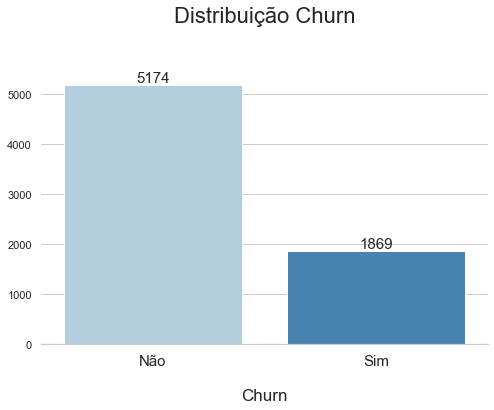

In [241]:
plot_countplot(dataset, dataset.Churn, 'Distribuição Churn', 'Churn') 

Analisando a distribuição acima é possivel notar que não está balanceada, para os próximos passos devemos balancear nossos dados.

## Aplicar encoding nos dados

In [242]:
dataset.head()

,Identificação do Cliente,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Serviço de Internet,...,Proteção Dispositivo,Suporte Técnico,TV a Cabo,Stremaming Filmes,Tipo do Contrato,Fatura Online,Forma de Pagamento,Total Gasto Mensal,Total Gasto Anual,Total Gasto Diário
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque,65.6,593.30,2.186667
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Cheque,59.9,542.40,1.996667
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque,83.9,267.40,2.796667


Verificando os dados de 'Identificação do Cliente' notamos que se tratam de valores UNICOS, sendo assim, não faz sentido deixarmos em nosso dataset para o encoding.

Verificando os dados de 'Total Gasto Anual' notamos que os valores se tratam da multiplicação de 'Total Gasto Mensal' e 'Meses de Contrato', sendo assim, não faz sentido deixarmos em nosso dataset para o encoding.

Verificando os dados de 'Total Gasto Diário' notamos que os valores se tratam da divisão de 'Total Gasto Mensal' por 30 que é a média de dias de um mês, sendo assim, não faz sentido deixarmos em nosso dataset para o encoding.

In [243]:
dataset = dataset.drop(columns=['Identificação do Cliente', 'Total Gasto Anual', 'Total Gasto Diário'], axis=1)

In [244]:
dataset.head()

,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Serviço de Internet,Proteção Internet,Backup Online,Proteção Dispositivo,Suporte Técnico,TV a Cabo,Stremaming Filmes,Tipo do Contrato,Fatura Online,Forma de Pagamento,Total Gasto Mensal
0,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Um ano,Sim,Cheque,65.6
1,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mês a mês,Não,Cheque,59.9
2,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9
3,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.0
4,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque,83.9


Agora precisamos verificar as variáveis categoricas do dataset:

In [245]:
for data in dataset.select_dtypes(include=['object']).columns:
       print(f"{data}: {dataset[data].unique()}")

Churn: ['Não' 'Sim']
Sexo: ['Feminino' 'Masculino']
Idoso: ['Não' 'Sim']
Casado: ['Sim' 'Não']
Dependentes: ['Sim' 'Não']
Serviço Telefônico: ['Sim' 'Não']
Multiplas Linhas: ['Não' 'Sim' 'No phone service']
Serviço de Internet: ['DSL' 'Fibra ótica' 'Não']
Proteção Internet: ['Não' 'Sim' 'Não tem serviço de internet']
Backup Online: ['Sim' 'Não' 'Não tem serviço de internet']
Proteção Dispositivo: ['Não' 'Sim' 'Não tem serviço de internet']
Suporte Técnico: ['Sim' 'Não' 'Não tem serviço de internet']
TV a Cabo: ['Sim' 'Não' 'Não tem serviço de internet']
Stremaming Filmes: ['Não' 'Sim' 'Não tem serviço de internet']
Tipo do Contrato: ['Um ano' 'Mês a mês' 'Dois anos']
Fatura Online: ['Sim' 'Não']
Forma de Pagamento: ['Cheque' 'Cheque eletrônico' 'Cartão de crédito (automático)'
 'Transferência bancária (automática)']


Existem várias variáveis categoricas maior que dois, precisamos resolver isso para aplicar o Encoding.

**['Multiplas Linhas', 'Proteção Internet', 'Backup Online', 'Proteção Dispositivo', 'Suporte Técnico', 'Suporte Técnico', 'TV a Cabo']** essas variáveis tem **['Sim', 'Não', 'Não tem serviço ...']** a terceira opção **'Não tem serviço ...'** equivale a **'Não'**, logo devemos transformar essas opções em **'Não'**.

In [246]:
dict_nao = {'Não tem serviço de internet' : 'Não',
          'No phone service' : 'Não'        
}

dataset = dataset.replace(dict_nao)

In [247]:
for data in dataset.select_dtypes(include=['object']).columns:
       print(f"{data}: {dataset[data].unique()}")

Churn: ['Não' 'Sim']
Sexo: ['Feminino' 'Masculino']
Idoso: ['Não' 'Sim']
Casado: ['Sim' 'Não']
Dependentes: ['Sim' 'Não']
Serviço Telefônico: ['Sim' 'Não']
Multiplas Linhas: ['Não' 'Sim']
Serviço de Internet: ['DSL' 'Fibra ótica' 'Não']
Proteção Internet: ['Não' 'Sim']
Backup Online: ['Sim' 'Não']
Proteção Dispositivo: ['Não' 'Sim']
Suporte Técnico: ['Sim' 'Não']
TV a Cabo: ['Sim' 'Não']
Stremaming Filmes: ['Não' 'Sim']
Tipo do Contrato: ['Um ano' 'Mês a mês' 'Dois anos']
Fatura Online: ['Sim' 'Não']
Forma de Pagamento: ['Cheque' 'Cheque eletrônico' 'Cartão de crédito (automático)'
 'Transferência bancária (automática)']


**['Serviço de Internet', 'Tipo do Contrato', 'Forma de Pagamento']** tem mais de duas categorias por conta disso teremos que fazer o **[One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)**.

In [248]:
colunas_categoricas = ['Serviço de Internet', 'Tipo do Contrato', 'Forma de Pagamento']

dataset = pd.get_dummies(data=dataset, columns=colunas_categoricas)
dataset.head(3)

,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Proteção Internet,Backup Online,...,Serviço de Internet_DSL,Serviço de Internet_Fibra ótica,Serviço de Internet_Não,Tipo do Contrato_Dois anos,Tipo do Contrato_Mês a mês,Tipo do Contrato_Um ano,Forma de Pagamento_Cartão de crédito (automático),Forma de Pagamento_Cheque,Forma de Pagamento_Cheque eletrônico,Forma de Pagamento_Transferência bancária (automática)
0,Não,Feminino,Não,Sim,Sim,9,Sim,Não,Não,Sim,...,1,0,0,0,0,1,0,1,0,0
1,Não,Masculino,Não,Não,Não,9,Sim,Sim,Não,Não,...,1,0,0,0,1,0,0,1,0,0
2,Sim,Masculino,Não,Não,Não,4,Sim,Não,Não,Não,...,0,1,0,0,1,0,0,0,1,0


Precisamos alterar a coluna 'Sexo' para:

0 = Masculino

1 = Feminino

In [249]:
mapa = {'Masculino': 0, 'Feminino': 1}

dataset.Sexo = dataset.Sexo.replace(mapa)
dataset.head(3)

,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Proteção Internet,Backup Online,...,Serviço de Internet_DSL,Serviço de Internet_Fibra ótica,Serviço de Internet_Não,Tipo do Contrato_Dois anos,Tipo do Contrato_Mês a mês,Tipo do Contrato_Um ano,Forma de Pagamento_Cartão de crédito (automático),Forma de Pagamento_Cheque,Forma de Pagamento_Cheque eletrônico,Forma de Pagamento_Transferência bancária (automática)
0,Não,1,Não,Sim,Sim,9,Sim,Não,Não,Sim,...,1,0,0,0,0,1,0,1,0,0
1,Não,0,Não,Não,Não,9,Sim,Sim,Não,Não,...,1,0,0,0,1,0,0,1,0,0
2,Sim,0,Não,Não,Não,4,Sim,Não,Não,Não,...,0,1,0,0,1,0,0,0,1,0


Agora devemos alterar:

0 = Não

1 = Sim

In [250]:
mapa = {'Não':0, 'Sim':1}

dataset = dataset.replace(mapa)
dataset.head(3)

,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Proteção Internet,Backup Online,...,Serviço de Internet_DSL,Serviço de Internet_Fibra ótica,Serviço de Internet_Não,Tipo do Contrato_Dois anos,Tipo do Contrato_Mês a mês,Tipo do Contrato_Um ano,Forma de Pagamento_Cartão de crédito (automático),Forma de Pagamento_Cheque,Forma de Pagamento_Cheque eletrônico,Forma de Pagamento_Transferência bancária (automática)
0,0,1,0,1,1,9,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


Conforme feito acima transformamos todas as variáveis categóricas em **[0,1]**

## Balanceando dados

In [251]:
from imblearn.over_sampling import SMOTE

In [252]:
x = dataset.drop(['Churn'], axis=1)
y = dataset['Churn']

In [253]:
sm = SMOTE(random_state=SEED)
x_res, y_res = sm.fit_resample(x, y)

In [254]:
dataset2 = pd.concat([pd.DataFrame(x_res), pd.DataFrame(y_res)], axis=1)

In [255]:
dataset2.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

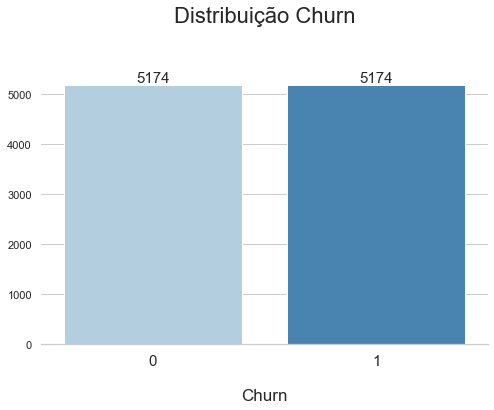

In [256]:
plot_countplot(dataset2, dataset2.Churn, 'Distribuição Churn', 'Churn')

## Criar dois ou mais modelos de Machine Learning

### Logistic Regression

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [258]:
x= dataset2.drop('Churn', axis=1)
y = dataset2['Churn']

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [260]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
model_lr = lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precisão:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr)) 
print("F1:",metrics.f1_score(y_test, y_pred_lr))

Acurácia: 0.83494395052184
Precisão: 0.8350515463917526
Recall: 0.8278301886792453
F1: 0.8314251875246743


### Decision Tree

In [261]:
from sklearn.tree import DecisionTreeClassifier

In [262]:
dt = DecisionTreeClassifier(max_depth = 5, random_state=SEED)
model_dt = dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precisão:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt)) 
print("F1:",metrics.f1_score(y_test, y_pred_dt))

Acurácia: 0.8047931967529958
Precisão: 0.777295733911786
Recall: 0.845125786163522
F1: 0.8097928436911489


### Random Forest

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
rf = RandomForestClassifier(max_depth= 5, random_state = SEED)
model_rf = rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precisão:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf)) 
print("F1:",metrics.f1_score(y_test, y_pred_rf))

Acurácia: 0.8005411673753382
Precisão: 0.7684659090909091
Recall: 0.85062893081761
F1: 0.807462686567164


## Avaliar cada modelo utilizando métricas de ML

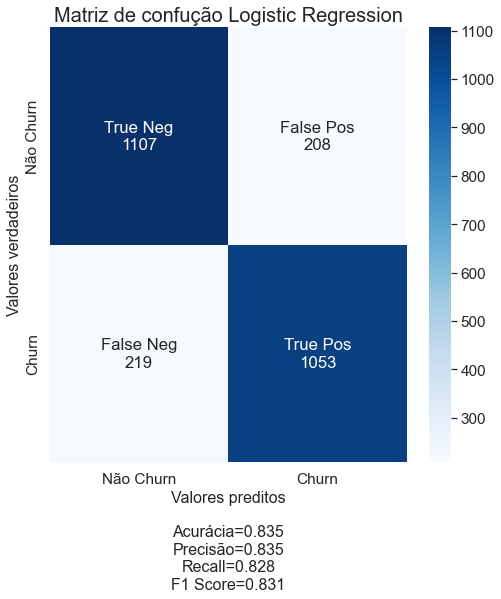

In [265]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]

plot_matriz_confusao(y_test,
                     y_pred_lr,
                     group_names=labels,
                     categories=categories,
                     figsize=(8,8),
                     title='Matriz de confução Logistic Regression')

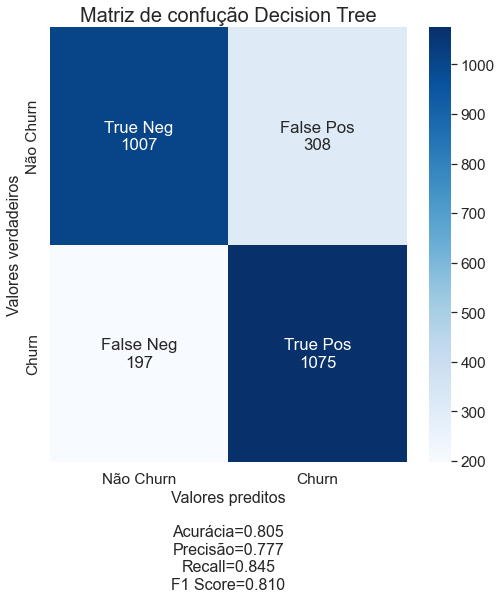

In [266]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]

plot_matriz_confusao(y_test,
                     y_pred_dt,
                     group_names=labels,
                     categories=categories,
                     figsize=(8,8),
                     title='Matriz de confução Decision Tree')

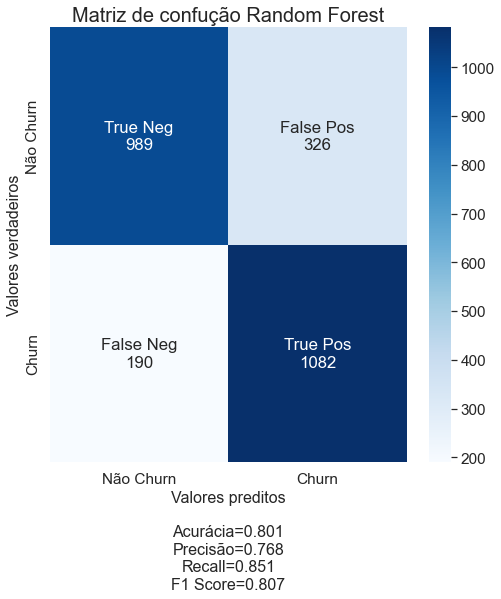

In [267]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]

plot_matriz_confusao(y_test,
                     y_pred_rf,
                     group_names=labels,
                     categories=categories,
                     figsize=(8,8),
                     title='Matriz de confução Random Forest')

## Escolhendo melhor modelo

Conforme acima, plotamos três **confusion matrix** para e as métricas para entender qual o melhor modelo. Conforme ensinado no [Curso: Machine Learning: Credit Scoring](https://cursos.alura.com.br/course/machine-learning-credit-scoring/task/92914), as métricas são:

**Precisão**: Proporção de predições corretas de uma categoria em relação a todas as predições desta categoria.

**Recall**: Proporção de predições corretas de categoria alvo.

**F1-Score**: Média harmônica entre precisão e recall.

Para definir o melhor modelo devemos então escolher o que tem maior **Recall**.

**Verificando os três modelos: Logistic Regression, Decision Tree e Random Forest temos:**

Logistic Regression **Recall** = 0.82.

Decision Tree **Recall** = 0.84.

Random Forest **Recall** = 0.85.

Por essa razão o modelo escolhido é **Random Forest**.

## Melhorando modelo escolhido

Usando como base o curso [Modelos preditivos em dados: detecção de fraude](https://cursos.alura.com.br/course/modelos-preditivos-dados-deteccao-fraude) para melhorar um modelo devemos alterar alguns hiperparâmetros, uma forma de fazer isso é utilizar [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). o RandomizedSearchCV irá randomizar os hiperparâmetros e assim podemos verificar qual utilizar.

In [268]:
from sklearn.model_selection import RandomizedSearchCV

In [269]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [270]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [271]:
random_cv = RandomizedSearchCV(
    rf, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)

In [272]:
%%time
rcv = random_cv.fit(x,y)

CPU times: total: 1.47 s
Wall time: 5.32 s


In [273]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.682499,0.056635,0.145611,0.010006,160,8,1,sqrt,8,gini,False,"{'n_estimators': 160, 'min_samples_split': 8, ...",0.644638,0.947216,0.948986,0.846946,0.143056,1
1,0.825459,0.150650,0.092752,0.017158,120,8,4,sqrt,4,gini,True,"{'n_estimators': 120, 'min_samples_split': 8, ...",0.741449,0.906613,0.888696,0.845586,0.073998,2
2,1.157902,0.008617,0.091090,0.005235,180,6,4,sqrt,2,gini,False,"{'n_estimators': 180, 'min_samples_split': 6, ...",0.793623,0.846868,0.837101,0.825864,0.023144,4
3,0.666219,0.007329,0.073802,0.019254,160,2,1,auto,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.781449,0.845708,0.834203,0.820453,0.027977,5
4,0.185170,0.012652,0.025266,0.004098,40,4,1,log2,3,gini,False,"{'n_estimators': 40, 'min_samples_split': 4, '...",0.775652,0.881671,0.866087,0.841137,0.046739,3


Com isso podemos determinar que os melhores hiperparâmetros para nosso modelo é a **LINHA 2**

In [274]:
rcv.best_params_

{'n_estimators': 160,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini',
 'bootstrap': False}

In [275]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)
model = rfn.fit(x_train, y_train)
y_pred_rf = rfn.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precisão:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))
print("F1:",metrics.f1_score(y_test, y_pred_rf))

Acurácia: 0.8248936992655586
Precisão: 0.7939698492462312
Recall: 0.8694968553459119
F1: 0.8300187617260789


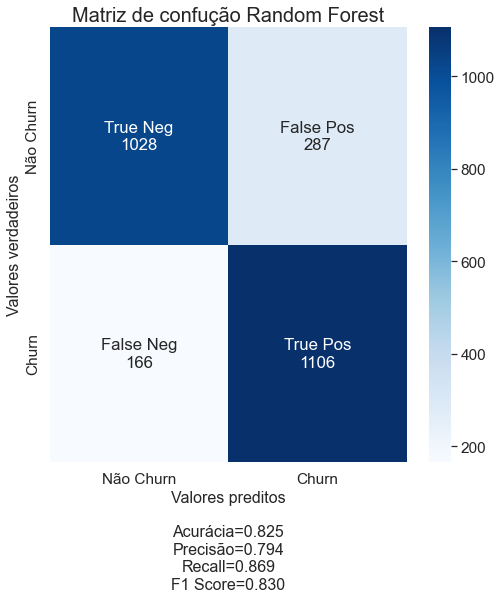

In [276]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]

plot_matriz_confusao(y_test,
                     y_pred_rf,
                     group_names=labels,
                     categories=categories,
                     figsize=(8,8),
                     title='Matriz de confução Random Forest')

Usando o RandomizedSearchCV conseguimos melhorar o **Recall** para **0.869**

## Aplicar modelo aos dados vazios

Na primeira semana nos foi disponibilizado um conjunto de dados que em 224 registros na coluna 'Churn' os dados eram vazios, nós retiramos esses registros para darmos andamento as analises, agora que já treinamos o modelo, iremos aplicar as previsoes nesse conjunto de dados.

In [277]:
dataset_vazios = pd.read_csv(r'C:\Users\Jose Eduardo\Documents\GitHub\alura_challenge\Dados\dataset_vazios_formatado.csv')
dataset_vazios.head(3)

,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Proteção Internet,Backup Online,...,Serviço de Internet_DSL,Serviço de Internet_Fibra ótica,Serviço de Internet_Não,Tipo do Contrato_Dois anos,Tipo do Contrato_Mês a mês,Tipo do Contrato_Um ano,Forma de Pagamento_Cartão de crédito (automático),Forma de Pagamento_Cheque,Forma de Pagamento_Cheque eletrônico,Forma de Pagamento_Transferência bancária (automática)
0,NaN,1,0,0,0,11,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1
1,NaN,0,0,0,0,71,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,NaN,0,0,0,0,29,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0


In [278]:
dataset_vazios.head()

,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Proteção Internet,Backup Online,...,Serviço de Internet_DSL,Serviço de Internet_Fibra ótica,Serviço de Internet_Não,Tipo do Contrato_Dois anos,Tipo do Contrato_Mês a mês,Tipo do Contrato_Um ano,Forma de Pagamento_Cartão de crédito (automático),Forma de Pagamento_Cheque,Forma de Pagamento_Cheque eletrônico,Forma de Pagamento_Transferência bancária (automática)
0,NaN,1,0,0,0,11,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1
1,NaN,0,0,0,0,71,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,NaN,0,0,0,0,29,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,NaN,1,1,0,0,5,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,NaN,0,1,1,0,65,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [279]:
dataset_new = dataset_vazios.drop(['Churn'], axis=1)

In [280]:
predict = rfn.predict(dataset_new)

dataset_vazios['Churn'] = predict
dataset_vazios.head()
dataset_new['Churn'] = predict

In [281]:
dataset_new['Churn'] = predict

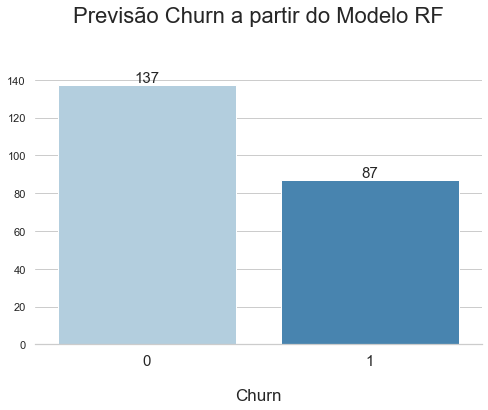

In [282]:
plot_countplot(data=dataset_new, 
               x=dataset_new.Churn,
               title='Previsão Churn a partir do Modelo RF',
               label_x='Churn')

Foi feito a previsão conforme acima, sendo que 0 = Não Churn e 1 = Churn